<a href="https://colab.research.google.com/github/pavan330/House-Price-Prediction/blob/main/House%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving houseprices.csv to houseprices.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("houseprices.csv")

In [ ]:
df.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1
3,138297,1800,1.0,2,0.48,49,1
4,129470,2088,1.0,3,1.84,29,1


In [ ]:
df.isnull().sum()

Price         0
LivingArea    0
Bathrooms     0
Bedrooms      0
LotSize       0
Age           0
Fireplace     0
dtype: int64

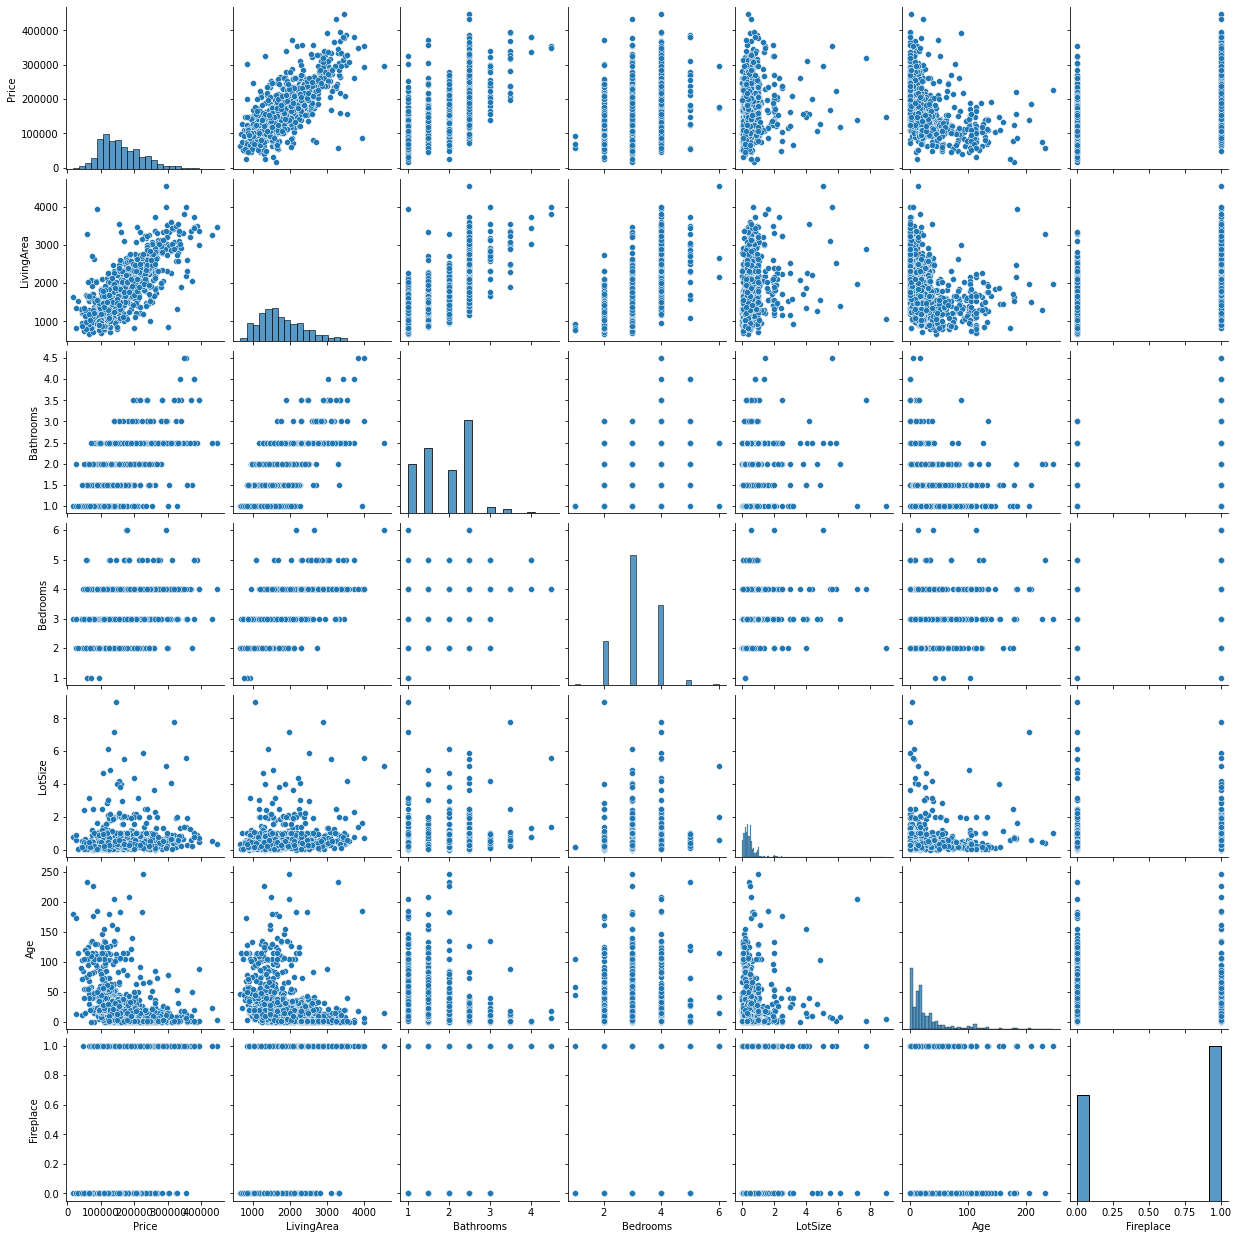

In [ ]:
sns.pairplot(df)

In [ ]:
df['Price'].value_counts()

139079    4
88092     3
198622    3
101230    3
189654    3
         ..
103633    1
141029    1
77650     1
283851    1
119389    1
Name: Price, Length: 940, dtype: int64

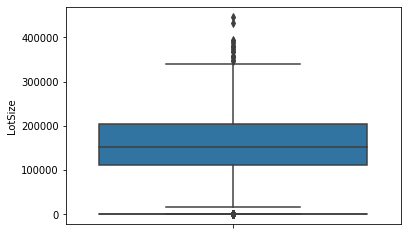

In [ ]:
sns.boxplot(y="Price", data=df)
sns.boxplot(y="LotSize",data=df)
plt.show()

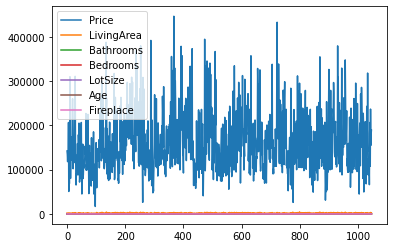

In [ ]:

df.plot()

(array([ 22., 150., 311., 237., 157.,  99.,  38.,  22.,   9.,   2.]),
 array([ 16858. ,  59815.8, 102773.6, 145731.4, 188689.2, 231647. ,
        274604.8, 317562.6, 360520.4, 403478.2, 446436. ]),
 <a list of 10 Patch objects>)

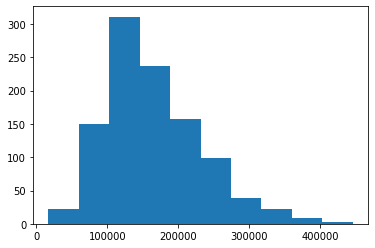

In [ ]:
plt.hist(df['Price'])

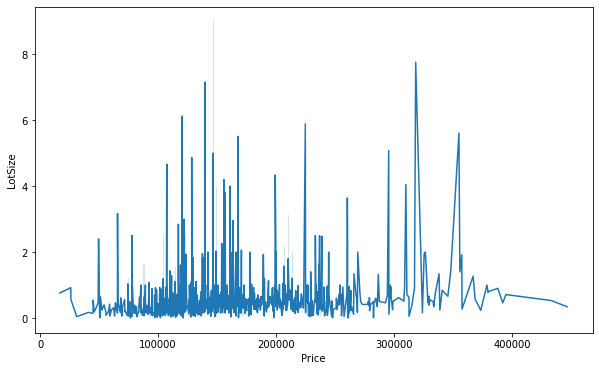

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Price',y='LotSize',data=df)

In [13]:
df['Bathrooms'].unique()

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [14]:
df['Bathrooms'].value_counts()

2.5    373
1.5    261
1.0    198
2.0    172
3.0     23
3.5     15
4.0      3
4.5      2
Name: Bathrooms, dtype: int64

In [15]:
df['Bedrooms'].unique()

array([3, 2, 4, 5, 6, 1])

In [17]:
df['Bedrooms'].value_counts()

3    522
4    321
2    176
5     22
6      3
1      3
Name: Bedrooms, dtype: int64

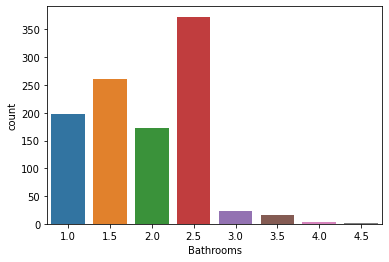

In [19]:
sns.countplot(x=df['Bathrooms'])

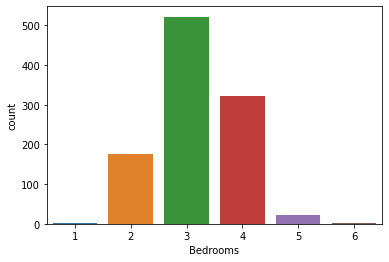

In [20]:
sns.countplot(x=df['Bedrooms'])

Text(0.5, 1.0, 'Price vs LotSize')

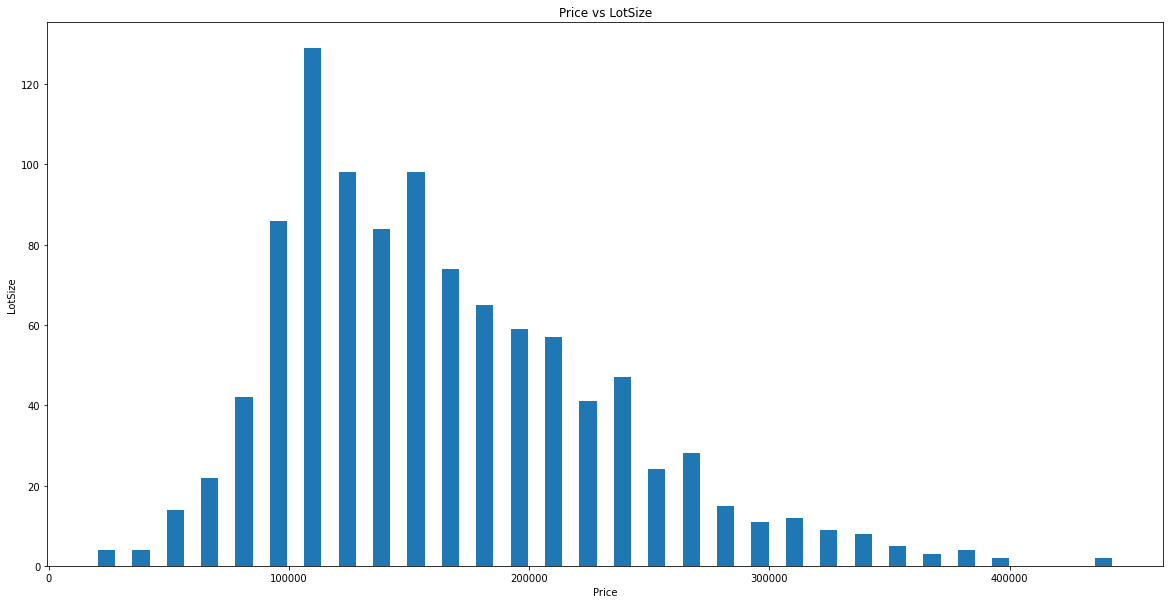

In [197]:
plt.figure(figsize=(20,10))
plt.hist(df['Price'],bins=30,rwidth=0.5)
plt.xlabel('Price')
plt.ylabel('LotSize')
plt.title('Price vs LotSize')

In [123]:
df['LivingArea'].shape,df['Price'].shape

((1047,), (1047,))

Linear Regression

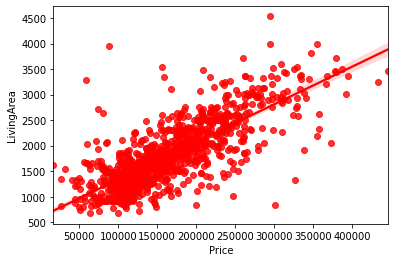

In [47]:
sns.regplot(x='Price', y='LivingArea', data=df,color='red')

In [151]:
x=df['Price'].values.reshape(-1,1)
y=df['LivingArea'].values.reshape(-1,1)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(x, y , random_state=0)

In [154]:
lr = LinearRegression()  

In [155]:
x_train.shape,y_train.shape

((1047, 1), (785, 1))

In [156]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
pred = lr.predict(x)

In [163]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, pred)
rmse = np.sqrt(mse)

In [164]:
print(rmse)

404.0843181775132


Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
rfc = RandomForestClassifier(n_estimators = 7,criterion="entropy")

In [186]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [187]:
rfcpred = rfc.predict(x)

In [188]:
from sklearn import metrics
rand_acc=metrics.accuracy_score(y, rfcpred)

In [193]:
rfcpred

array([1982, 1500, 1295, ..., 1440, 2030, 2097])

In [189]:
rand_acc

0.620821394460363

In [190]:
mse = mean_squared_error(y, rfcpred)
rmse = np.sqrt(mse)

In [191]:
print(rmse)

317.08095405292585
